In [1]:
%%markdown
# Problem 1

Consider the coin tossing example, discussed in the first lecture. Simulate 1000 tosses of the coins, setting $H = 0.3$. Consider a uniform prior and update the posterior at each toss. Plot the resulting posterior after 1, 50,100, 300, 700, 1000 tosses. Repeat the simulated experiment by setting
a Gaussian prior centered in $H = 0.5$, with standard deviation $\sigma = 0.1$.
Do both posteriors converge a similar distribution in the end? What does that mean? Which posterior converges faster and why?

# Problem 1

Consider the coin tossing example, discussed in the first lecture. Simulate 1000 tosses of the coins, setting $H = 0.3$. Consider a uniform prior and update the posterior at each toss. Plot the resulting posterior after 1, 50,100, 300, 700, 1000 tosses. Repeat the simulated experiment by setting
a Gaussian prior centered in $H = 0.5$, with standard deviation $\sigma = 0.1$.
Do both posteriors converge a similar distribution in the end? What does that mean? Which posterior converges faster and why?


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

np.random.seed(42)

In [3]:
def simulate_heads(heads_probability: float, number_tosses: int = 1) -> int:
    uniform = np.random.uniform(low=0., high=1., size=number_tosses)
    return(np.sum(uniform < heads_probability))

def binomial_distribution(heads_probability: float, number_heads: int, number_tosses: int)-> float:
    log_distribution = (number_heads * np.log(heads_probability) +
    (number_tosses - number_heads) * np.log(1 - heads_probability))
    log_distribution -= np.max(log_distribution)
    # normalize right now: allows for much greater numerical stability 
    return(np.exp(log_distribution))

In [4]:
H = .3
N_max = 10000

heads = []
heads_running_total=0
for n in range(N_max):
    h = simulate_heads(H)
    heads_running_total += h
    heads.append(heads_running_total)

In [5]:
H_samples = np.linspace(0, 1, num=1000)
gaussian_prior = np.exp(- (H_samples - .5)**2 / 2 / 0.1**2)

def plot(toss_number):
    likelihood = binomial_distribution(H_samples, heads[toss_number], toss_number)
    likelihood /= np.max(likelihood)
    posterior_flat_prior = np.copy(likelihood)
    posterior_gaussian_prior = gaussian_prior * likelihood
    posterior_gaussian_prior /= np.max(posterior_gaussian_prior)
    plt.plot(H_samples, posterior_flat_prior, label='Flat prior')
    plt.plot(H_samples, posterior_gaussian_prior, label='Gaussian prior')
    plt.axvline(H, c='black', label='True value')
    plt.xlabel('Heads probability')
    plt.legend()
    

interact(plot, toss_number=(0,N_max -1,1))

interactive(children=(IntSlider(value=4999, description='toss_number', max=9999), Output()), _dom_classes=('wi…

<function __main__.plot(toss_number)>

In [9]:
%%markdown
Both posteriors converge to very similar distributions in the end;
as we add more and more data the prior becomes less and less relevant,
it is "washed out" by the data.

In the early stages it seems that the narrower prior stays more narrow than the flat prior,
while also being usually more wrong (since it was rather unrepresentative of the true value).
Let us quantify this.

Both posteriors converge to very similar distributions in the end;
as we add more and more data the prior becomes less and less relevant,
it is "washed out" by the data.

In the early stages it seems that the narrower prior stays more narrow than the flat prior,
while also being usually more wrong (since it was rather unrepresentative of the true value).
Let us quantify this.


In [10]:
from scipy.integrate import trapz

def pdf_mean_std(x, pdf):
    pdf_integral = trapz(y=pdf, x=x)
    pdf /= pdf_integral
    mean = trapz(y=pdf * x, x=x)
    std = np.sqrt(trapz(y=pdf * (x-mean)**2, x=x))
    return(mean, std)

sigmas_flat = []
sigmas_gaussian= []
error_flat = []
error_gaussian = []

for toss_number in range(N_max):
    likelihood = binomial_distribution(H_samples, heads[toss_number], toss_number)
    likelihood /= np.max(likelihood)
    posterior_flat_prior = np.copy(likelihood)
    posterior_gaussian_prior = gaussian_prior * likelihood
    posterior_gaussian_prior /= np.max(posterior_gaussian_prior)

    mean_flat, std_flat = pdf_mean_std(H_samples, posterior_flat_prior)
    mean_gaussian, std_gaussian = pdf_mean_std(H_samples, posterior_gaussian_prior)

    sigmas_flat.append(std_flat)
    sigmas_gaussian.append(std_gaussian)
    error_flat.append((mean_flat - H) / std_flat)
    error_gaussian.append((mean_gaussian - H) / std_gaussian)

Text(0, 0.5, 'Standard deviation')

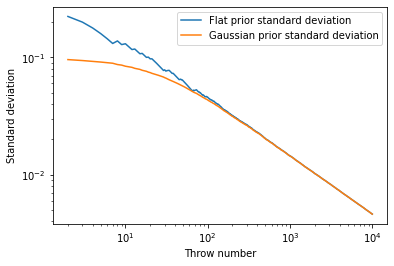

In [11]:
plt.loglog(sigmas_flat, label='Flat prior standard deviation')
plt.loglog(sigmas_gaussian, label='Gaussian prior standard deviation')
plt.legend()
plt.xlabel('Throw number')
plt.ylabel('Standard deviation')

Text(0, 0.5, 'Relative error')

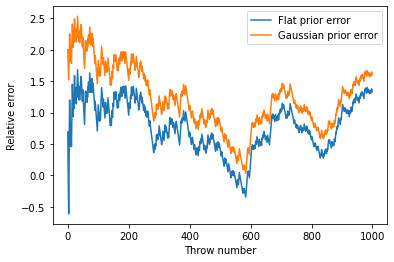

In [10]:
plt.plot(error_flat, label='Flat prior error')
plt.plot(error_gaussian, label='Gaussian prior error')
plt.legend()
plt.xlabel('Throw number')
plt.ylabel('Relative error')

In [11]:
%%markdown
# Problem 2
Politician $A$ makes a statement about some issue you knew nothing about before. Let’s call such proposition $S$ and assume your starting prior on $S$ is uniform with 0.5 probability of $S$ being either true or false. Update your probability of $S$ being true, knowing that you trust Mr. A to tell the truth with probability $\text{prob}(A_T ) = 4/5$. At this point Mr $B$ - another politician - declares that he agrees with Mr $A$ on $S$ being true. You trust Mr. $B$ much less, and believe that the probability of him to lie is $\text{prob}(B_F ) = 3/4$.
What is your final degree of belief in proposition S?

# Problem 2
Politician $A$ makes a statement about some issue you knew nothing about before. Let’s call such proposition $S$ and assume your starting prior on $S$ is uniform with 0.5 probability of $S$ being either true or false. Update your probability of $S$ being true, knowing that you trust Mr. A to tell the truth with probability $\text{prob}(A_T ) = 4/5$. At this point Mr $B$ - another politician - declares that he agrees with Mr $A$ on $S$ being true. You trust Mr. $B$ much less, and believe that the probability of him to lie is $\text{prob}(B_F ) = 3/4$.
What is your final degree of belief in proposition S?


In [12]:
P_A_T = 4./5. 
# probability that A tells the truth

likelihood = P_A_T
# probability that A said S, given that S is true

prior = .5 
# prior probability that S is true

evidence = likelihood * prior + (1-likelihood) * (1- prior)
# probability that A said S, independently of S
# written as P(A | S) P(S) + P(A | not S) P(not S)
# and P(A | not S) is the probability that A said something false

posterior = likelihood * prior / evidence
# Bayes' theorem

print(f'The posterior probability after A said S is {posterior}')

The posterior probability after A said S is 0.8


In [13]:
prior_2 = posterior

P_B_T = 1./4.
likelihood_2 = P_B_T
# probability that B said S, given that S is true

evidence_2 = likelihood_2 * prior_2 + (1-likelihood_2) * (1 - prior_2)
# probability that B said S, independently of S
# written as P(B | S) P(S) + P(B | not S) P(not S)
# and P(B | not S) is the probability that B said something false

posterior_2 = likelihood_2 * prior_2 / evidence_2
# Bayes' theorem

print(f'The posterior probability after both B and A said S is {posterior_2:.2f}')

The posterior probability after both B and A said S is 0.57


In [14]:
%%markdown

We can use an alternative approach, using an equation derived from considering 
Bayes' theorem 
$$
\mathbb{P}(A | B) = \frac{\mathbb{P}(B | A) \mathbb{P}(A)}{\mathbb{P}(B)}
$$
and Bayes' theorem applied to the proposition $\text{not } A$: 
$$
\mathbb{P}(\text{not } A| B) = \frac{\mathbb{P}(B | \text{not } A) \mathbb{P}(\text{not } A)}{\mathbb{P}(B)}
\,.
$$

Dividing one equation by the other we find that the $\mathbb{P}(B)$ term simplifies, so we have:
$$
\underbrace{\frac{\mathbb{P}(A|B)}{\mathbb{P}(\text{not } A | B)} }_{\text{posterior}}
=
\underbrace{\frac{\mathbb{P}(B|A)}{\mathbb{P}(B | \text{not } A)}}_{BF}
\underbrace{\frac{\mathbb{P}(A)}{\mathbb{P}(\text{not } A)}}_{\text{prior}}
\,.
$$

If we interpret $A$ as a statement, while $B$ represents data, we can readily identify the prior and posterior: they are expressed in terms of odds,
ratios of the probability of an even to the probability of its negation.

It is convenient to work in terms of the logarithm of these quantities: these are the _log-odds_,
which can take any value from $- \infty$ to $\infty$,
with the value 0 representing a flat distribution: $1/2$ probability for both the statement and its counter.

Then, we can find the posterior log-odds by adding the logarithm of the Bayes Factor to the prior log-odds.

We can then see that the Bayes Factor quantifies evidence in an understandable, additive way.
If we used base-2 logarithms we could talk of _bits_ of evidence in an information-theoretic sense.


We can use an alternative approach, using an equation derived from considering 
Bayes' theorem 
$$
\mathbb{P}(A | B) = \frac{\mathbb{P}(B | A) \mathbb{P}(A)}{\mathbb{P}(B)}
$$
and Bayes' theorem applied to the proposition $\text{not } A$: 
$$
\mathbb{P}(\text{not } A| B) = \frac{\mathbb{P}(B | \text{not } A) \mathbb{P}(\text{not } A)}{\mathbb{P}(B)}
\,.
$$

Dividing one equation by the other we find that the $\mathbb{P}(B)$ term simplifies, so we have:
$$
\underbrace{\frac{\mathbb{P}(A|B)}{\mathbb{P}(\text{not } A | B)} }_{\text{posterior}}
=
\underbrace{\frac{\mathbb{P}(B|A)}{\mathbb{P}(B | \text{not } A)}}_{BF}
\underbrace{\frac{\mathbb{P}(A)}{\mathbb{P}(\text{not } A)}}_{\text{prior}}
\,.
$$

If we interpret $A$ as a statement, while $B$ represents data, we can readily identify the prior and posterior: they are expressed in terms of odds,
ratios of the probability of an even to the probability of its negation.

It is convenient to work in terms of the logarithm of these quantities: these are the _log-odds_,
which can take any value from $- \infty$ to $\infty$,
with the value 0 representing a flat distribution: $1/2$ probability for both the statement and its counter.

Then, we can find the posterior log-odds by adding the logarithm of the Bayes Factor to the prior log-odds.

We can then see that the Bayes Factor quantifies evidence in an understandable, additive way.
If we used base-2 logarithms we could talk of _bits_ of evidence in an information-theoretic sense.


In [15]:
# Alternative approach, using log-odds

def log_odds(p):
    return(np.log(p) - np.log(1-p))

def probability(lo):
    return(np.exp(lo) / (1 + np.exp(lo)))

log_prior = log_odds(prior)

log_bayes_factor_1 = log_odds(P_A_T)
log_bayes_factor_2 = log_odds(P_B_T)
# a special case, due to the fact that A and B
# lie or tell the truth independently of the topic
# in general the Bayes factor would be
# BF = P(A | S) / P(A | not S)

log_posterior = log_bayes_factor_1 + log_bayes_factor_2 + log_prior
posterior_alternative = probability(log_posterior)
print(posterior_alternative)

0.5714285714285714


In [16]:
%%markdown
# Problem 3
You are tested for a dangerous disease named ”Bacillum Bayesianum”
(BB). You test positive to BB. You know that the general incidence of BB in the population is 1%. Moreover, you know that your test has a false negative probability of 5% (false negative: you have BB but the test scores negative), and a false positive rate also of 5% (false positive: you do not have BB, but the test scores positive). What is the probability that you have actually contracted BB?

# Problem 3
You are tested for a dangerous disease named ”Bacillum Bayesianum”
(BB). You test positive to BB. You know that the general incidence of BB in the population is 1%. Moreover, you know that your test has a false negative probability of 5% (false negative: you have BB but the test scores negative), and a false positive rate also of 5% (false positive: you do not have BB, but the test scores positive). What is the probability that you have actually contracted BB?


In [37]:
prior_BB = .01
false_negative = .05
false_positive = .05

true_positive = 1 - false_positive
true_negative = 1 - false_negative

log_prior_BB = log_odds(prior_BB)
log_bayes_factor_BB = np.log(true_positive / false_positive)
log_bayes_factor_BB_negative_test = np.log(false_negative / true_negative)
# always referring to the statement 
# "you have BB"

log_posterior_BB = log_bayes_factor_BB + log_prior_BB
posterior_BB = probability(log_posterior_BB)
print(f'The probability of having BB after having tested positive is {posterior_BB:.2f}')

The probability of having BB after having tested positive is 0.16


In [38]:
print(f'Log-prior = {log_prior_BB:.2f}')
print(f'Log-BF = {log_bayes_factor_BB:.2f}')
print(f'Log-posterior = {log_posterior_BB:.2f}')

print(f'Log-BF of a negative test: {log_bayes_factor_BB_negative_test:.2f}')

Log-prior = -4.60
Log-BF = 2.94
Log-posterior = -1.65
Log-BF of a negative test: -4.60


In [39]:
%%markdown
This formalism allows us to see more easily how much more evidence would
sway our belief: the log-odds of the prior are about $-4.5$, while the
log-BF for each positive test gives us about 3 units of evidence to the
fact that we have the disease.

Since the false negative and false positive probabilities are equal, 
a negative test sways our belief by the exact opposite amount as a positive test.
If we test negative once and then positive once, our belief will be
equal to the prior. 

This formalism allows us to see more easily how much more evidence would
sway our belief: the log-odds of the prior are about $-4.5$, while the
log-BF for each positive test gives us about 3 units of evidence to the
fact that we have the disease.

Since the false negative and false positive probabilities are equal, 
a negative test sways our belief by the exact opposite amount as a positive test.
If we test negative once and then positive once, our belief will be
equal to the prior. 
